<h1> Forecasting U.S. Large Cap Stock Volatility using GARCH Neural Network <h1>

### Step 1: Data Extraction

For this portion of our code, we will be extracting price data on all the stocks that are part of the U.S. S&P 500 from the IEX (Investor's Exchange) using the Tiingo Stock & Financial Markets API (third party data vendor). The prices will be hourly closing quotes and extracted for a period of 5 years (May 2019 to May 2024).

In [2]:
#Import of all relevant libraries necessary for data extraction process

import pandas as pd #Import library "pandas" and refer to it by shorthand "pd" throughout the program
import numpy as np #Import library "numpy" and refer to it by shorthand "np" throughout the program

import tiingo #Import library "tiingo" (necessary in order to use Tiingo API for stock time-series data)

from tiingo import TiingoClient #From the "tiingo" library import library "TiingoClient"(used to establish a connection to API)

import datetime #Import library "datetime"
from datetime import date #From library "datetime", import library "date"

from dateutil.relativedelta import relativedelta #Import the library "relativedelta" from the "dateutil" library

In [3]:
#Define start and end date from which time series data must be extracted

length_of_timeframe = 5 #Number of years for which historical time series data will be extracted.

today = date.today() #Obtain today's date as a datetime object
end = today.strftime("%Y-%m-%d") #Convert today's date to YYYY-MM-DD format. This will serve as the end date for the time series data.

today = today - relativedelta(years=length_of_timeframe) #Determine start date (by subtracting 5 years from the end date defined above)
start = today.strftime("%Y-%m-%d") #Convert start date to YYYY-MM-DD format. This will serve as the start date for the time series data.

In [4]:
#Define function to extract daily closing price data as a time series

client = TiingoClient({'api_key':'296d8e8627cf5eb878e6f84435c023614096a5e2'}) #Input API Token for Tiingo API


#Function to extract end of day price data for specified ticker symbol(s) on an hourly basis over the specified timeframe (from start to end date)

def extract_hourly_timeseries_price_data(start_date, end_date, ticker):
    ticker_history = client.get_dataframe(ticker, frequency='1Hour', metric_name='close', 
                                          startDate= start, endDate= end)
    return ticker_history

In [5]:
#Obtain S&P 500 Tickers and place into an array

#Obtain list of S&P 500 listed companies by extracting HTML from Wikipedia list of S&P 500 companies. Extracted HTML placed into pandas dataframe.
sp_500_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

#Isolate ticker symbols from pandas dataframe
sp500_tickers = sp_500_companies['Symbol'].tolist()

In [6]:
#Import libraries necessary for chunking & parallel computing (used to speed up data extraction process)

import multiprocessing as mp #Import library "multiprocessing" and refer to it by shorthand "mp" throughout the program
from multiprocessing import pool #From the "multiprocessing" library import the "pool" library

import time #Import library "time"

In [7]:
#Split the array of S&P 500 stock tickers into 24 separate sub-arrays.
split_arrays_of_tickers = np.array_split(sp500_tickers, 36)

#Current machine has the capacity to run processes on 4 cores & the optimum number of tickers for a single API call is between 10-13. 
#Therefore, 12 separate iterations of running API calls on 3 cores (leaving 1 core for other operations) is optimum, which necessitates 12 x 3 or 36 sub-arrays of tickers.

In [8]:
#Extract hourly closing prices for all stocks in the S&P 500 index from May 2019 to May 2024 (5 years total)

start_time = time.time() #Start clock (output of this portion of the script is execution time on the console, which is used to determine when the extraction of the data from the API has been completed)

all_stock_data = [] #Create an array to aggregate the outputs of each API call (stock price data for each stock)


#Loop over each of the sub-arrays containing 10-13 tickers of S&P 500 listed companies' stock & call the API to extract hourly stock price data for aforementioned date range
#After receiving output from API, append data to "all_stock_data" array

print("Starting data extraction") #Debugging statement used to determine whether data extraction has started

for i in range(1,13):
    pool_main = mp.Pool(processes = 3) #Create a queue sub-processes of size 3 within the pool object
    extracted_data = [] #Create array to hold aggregated extracted price data
    arguments = [] #Create array to hold arguments for the "extract_hourly_timeseries_price_data" function in each sub-process
    
    print("Beginning extraction") #Debugging statement used to determine which batch of tickers we are presently on
    
    for a in range (3*(i-1), 3*i):
        sub_argument = (start, end, split_arrays_of_tickers[a]) #Create a function call
        arguments.append(sub_argument) #Add function call to the queue
        
    extracted_data = pool_main.starmap(extract_hourly_timeseries_price_data, arguments) #Execute all function calls held int he queue of the pool object
    
    all_stock_data.append(extracted_data) #Append data that is provided as output by the pool object to the aggregator array
    print("Finished with batch {}".format(i)) #Debugging statement used to confirm that data has been successfully extracted for a batch of tickers

#Calculate execution time of data extraction process and display
total_execution_time = (time.time() - start_time)
total_execution_time

Starting data extraction
Beginning extraction
Finished with batch 1
Beginning extraction
Finished with batch 2
Beginning extraction
Finished with batch 3
Beginning extraction
Finished with batch 4
Beginning extraction
Finished with batch 5
Beginning extraction
Finished with batch 6
Beginning extraction
Finished with batch 7
Beginning extraction
Finished with batch 8
Beginning extraction
Finished with batch 9
Beginning extraction
Finished with batch 10
Beginning extraction
Finished with batch 11
Beginning extraction
Finished with batch 12


421.3513808250427

Process ForkPoolWorker-19:
Process ForkPoolWorker-30:
Process ForkPoolWorker-35:
Process ForkPoolWorker-29:
Process ForkPoolWorker-31:
Process ForkPoolWorker-34:
Process ForkPoolWorker-28:
Process ForkPoolWorker-27:
Process ForkPoolWorker-25:
Process ForkPoolWorker-20:
Process ForkPoolWorker-18:
Process ForkPoolWorker-12:
Process ForkPoolWorker-15:
Process ForkPoolWorker-10:
Process ForkPoolWorker-14:
Process ForkPoolWorker-6:
Process ForkPoolWorker-9:
Process ForkPoolWorker-22:
Process ForkPoolWorker-4:
Process ForkPoolWorker-33:
Process ForkPoolWorker-26:
Process ForkPoolWorker-16:
Process ForkPoolWorker-23:
Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-8:
Process ForkPoolWorker-1:
Process ForkPoolWorker-7:
Process ForkPoolWorker-32:
Process ForkPoolWorker-24:
Process ForkPoolWorker-36:
Process ForkPoolWorker-5:
Process ForkPoolWorker-2:
Process ForkPoolWorker-17:
Process ForkPoolWorker-21:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Tr

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frame

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Libra

KeyboardInterrupt
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


In [9]:
#Concatenate data from each set of tickers into single pandas dataframe
df1 = pd.concat([all_stock_data[0][0], all_stock_data[0][1], all_stock_data[0][2]], axis = 1)
df2 = pd.concat([all_stock_data[1][0], all_stock_data[1][1], all_stock_data[1][2]], axis = 1)
df3 = pd.concat([all_stock_data[2][0], all_stock_data[2][1], all_stock_data[2][2]], axis = 1)
df4 = pd.concat([all_stock_data[3][0], all_stock_data[3][1], all_stock_data[3][2]], axis = 1)
df5 = pd.concat([all_stock_data[4][0], all_stock_data[4][1], all_stock_data[4][2]], axis = 1)
df6 = pd.concat([all_stock_data[5][0], all_stock_data[5][1], all_stock_data[5][2]], axis = 1)
df7 = pd.concat([all_stock_data[6][0], all_stock_data[6][1], all_stock_data[6][2]], axis = 1)
df8 = pd.concat([all_stock_data[7][0], all_stock_data[7][1], all_stock_data[7][2]], axis = 1)
df9 = pd.concat([all_stock_data[8][0], all_stock_data[8][1], all_stock_data[8][2]], axis = 1)
df10 = pd.concat([all_stock_data[9][0], all_stock_data[9][1], all_stock_data[9][2]], axis = 1)
df11 = pd.concat([all_stock_data[10][0], all_stock_data[10][1], all_stock_data[10][2]], axis = 1)
df12 = pd.concat([all_stock_data[11][0], all_stock_data[11][1], all_stock_data[11][2]], axis = 1)

#Concatenate all dataframes together into single table that aggregates all extracted price data
final_dataframe = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1)

#all_stock_data[0][1]

In [10]:
#Display portion of dataframe with raw data
final_dataframe

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
2019-06-12 14:00:00+00:00,169.855,44.575,81.380,79.050,184.590,275.770,32.025,16.740,54.585,69.250,...,24.755,27.525,188.245,115.320,59.445,80.010,109.010,192.24,120.690,111.110
2019-06-12 15:00:00+00:00,169.425,44.730,81.450,78.870,183.820,276.420,32.070,16.725,54.310,69.335,...,24.575,27.545,188.020,114.120,59.600,79.845,108.975,193.25,120.595,111.250
2019-06-12 16:00:00+00:00,169.640,44.780,81.590,78.770,184.730,277.090,32.535,16.750,54.300,69.675,...,24.750,27.450,188.790,114.805,59.515,79.700,108.960,193.85,120.750,111.550
2019-06-12 17:00:00+00:00,169.540,45.155,81.590,78.580,184.695,276.555,32.380,16.740,54.380,69.890,...,25.040,27.250,189.210,114.260,59.350,79.920,109.085,193.15,120.910,111.550
2019-06-12 18:00:00+00:00,169.165,44.980,81.740,78.450,185.030,277.200,32.215,16.745,54.445,70.005,...,25.060,27.070,188.970,114.580,59.390,80.140,108.945,192.82,120.905,111.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12 15:00:00+00:00,101.555,83.540,105.110,165.970,288.805,469.790,161.605,19.870,87.850,133.180,...,29.425,41.600,255.700,91.310,54.940,140.735,138.170,307.23,108.830,175.685
2024-06-12 16:00:00+00:00,101.375,83.400,104.675,165.710,287.930,469.180,161.110,19.780,88.075,133.500,...,29.305,41.700,256.355,91.230,54.890,141.040,137.840,306.42,108.775,175.570
2024-06-12 17:00:00+00:00,101.325,83.715,104.650,165.435,286.660,465.205,160.080,19.790,88.040,133.430,...,29.370,41.605,256.035,91.075,55.000,140.905,137.610,306.47,108.510,175.560
2024-06-12 18:00:00+00:00,101.100,84.185,104.510,165.430,286.920,462.695,159.900,19.825,88.160,133.290,...,29.220,41.650,255.620,90.740,54.760,141.050,137.455,306.31,107.450,175.730


### Step 2: Data Preprocessing and Cleaning

The next portion of our code will be cleaning the data extracted in the previous step. The cleaning process will include removing tickers of companies that had stock splits which occurred in the last 5 years, addressing NaN values for stocks in the S&P 500 that began trading after May 2019, and calculating log-normal volatilities for each stock since May 2019.

In [11]:
#Address occurrence of NaN values by backfilling first non-NaN value and display head of cleaned dataset
data_clean_v1 = final_dataframe.bfill()

In [13]:
Data_Test_DF = data_clean_v1.copy(deep=True)
print("Done")

Done


In [15]:
#Replace "." character for tickers of companies that have multiple share classes (required for API calls for stock splits)
split_arrays_of_tickers_cleaned = [[x.replace('.','-') for x in a] for a in split_arrays_of_tickers]

In [16]:
#Aggregate stock splits over the last 5 years as of 05/07/2024:
#Same logic as extraction of stock price data

def extract_splits_data(start_date, end_date, ticker):
    split_history = client.get_dataframe(ticker, metric_name='splitFactor', startDate= start, endDate= end)
    return split_history

start_time = time.time() 
all_stock_splits = []

print("Starting split ratios extraction")

for i in range(1,13):
    pool_main = mp.Pool(processes = 3)
    extracted_splits = []
    arguments = []
    
    print("Beginning extraction")
    
    for a in range (3*(i-1), 3*i):
        sub_argument = (start, end, split_arrays_of_tickers_cleaned[a])
        arguments.append(sub_argument)
        
    extracted_splits = pool_main.starmap(extract_splits_data, arguments)
    
    all_stock_splits.append(extracted_splits)
    print("Finished with batch {}".format(i))

#Calculate execution time of data extraction process and display
total_execution_time = (time.time() - start_time)
total_execution_time

Starting split ratios extraction
Beginning extraction
Finished with batch 1
Beginning extraction
Finished with batch 2
Beginning extraction
Finished with batch 3
Beginning extraction
Finished with batch 4
Beginning extraction
Finished with batch 5
Beginning extraction
Finished with batch 6
Beginning extraction
Finished with batch 7
Beginning extraction
Finished with batch 8
Beginning extraction
Finished with batch 9
Beginning extraction
Finished with batch 10
Beginning extraction
Finished with batch 11
Beginning extraction
Finished with batch 12


145.8869469165802

Process ForkPoolWorker-65:
Process ForkPoolWorker-59:
Process ForkPoolWorker-56:
Process ForkPoolWorker-60:
Process ForkPoolWorker-58:
Process ForkPoolWorker-67:
Process ForkPoolWorker-57:
Process ForkPoolWorker-51:
Process ForkPoolWorker-38:
Process ForkPoolWorker-37:
Process ForkPoolWorker-71:
Process ForkPoolWorker-66:
Process ForkPoolWorker-72:
Process ForkPoolWorker-70:
Process ForkPoolWorker-62:
Process ForkPoolWorker-63:
Process ForkPoolWorker-61:
Process ForkPoolWorker-68:
Process ForkPoolWorker-69:
Process ForkPoolWorker-54:
Process ForkPoolWorker-55:
Process ForkPoolWorker-47:
Process ForkPoolWorker-39:
Process ForkPoolWorker-53:
Process ForkPoolWorker-64:
Process ForkPoolWorker-46:
Process ForkPoolWorker-49:
Process ForkPoolWorker-40:
Process ForkPoolWorker-42:
Process ForkPoolWorker-48:
Process ForkPoolWorker-44:
Process ForkPoolWorker-45:
Process ForkPoolWorker-52:
Process ForkPoolWorker-41:
Process ForkPoolWorker-50:
Process ForkPoolWorker-43:
Traceback (most recent call 

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frame

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3

  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/Libra

KeyboardInterrupt
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


In [17]:
#Concatenate data from each set of tickers into single pandas dataframe
df1 = pd.concat([all_stock_splits[0][0], all_stock_splits[0][1], all_stock_splits[0][2]], axis = 1)
df2 = pd.concat([all_stock_splits[1][0], all_stock_splits[1][1], all_stock_splits[1][2]], axis = 1)
df3 = pd.concat([all_stock_splits[2][0], all_stock_splits[2][1], all_stock_splits[2][2]], axis = 1)
df4 = pd.concat([all_stock_splits[3][0], all_stock_splits[3][1], all_stock_splits[3][2]], axis = 1)
df5 = pd.concat([all_stock_splits[4][0], all_stock_splits[4][1], all_stock_splits[4][2]], axis = 1)
df6 = pd.concat([all_stock_splits[5][0], all_stock_splits[5][1], all_stock_splits[5][2]], axis = 1)
df7 = pd.concat([all_stock_splits[6][0], all_stock_splits[6][1], all_stock_splits[6][2]], axis = 1)
df8 = pd.concat([all_stock_splits[7][0], all_stock_splits[7][1], all_stock_splits[7][2]], axis = 1)
df9 = pd.concat([all_stock_splits[8][0], all_stock_splits[8][1], all_stock_splits[8][2]], axis = 1)
df10 = pd.concat([all_stock_splits[9][0], all_stock_splits[9][1], all_stock_splits[9][2]], axis = 1)
df11 = pd.concat([all_stock_splits[10][0], all_stock_splits[10][1], all_stock_splits[10][2]], axis = 1)
df12 = pd.concat([all_stock_splits[11][0], all_stock_splits[11][1], all_stock_splits[11][2]], axis = 1)

#Concatenate all dataframes together into single table that aggregates all extracted price data
final_dataframe_splits = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1)

In [18]:
#Check for which stocks had splits over the last 5 years (any occurrence of split ratio other than "1") and isolate those from dataframe
above_one_booleans = final_dataframe_splits.apply(lambda col: any(col > 1.0))
stocks_with_splits = final_dataframe_splits.columns[above_one_booleans]
splits_over_last_five_years = final_dataframe_splits[stocks_with_splits]

In [19]:
#Reindex the list of companies that have had stock splits over the last 5 years to allow accessibility for rows via integers as opposed to timestamps
reindexed_splits = splits_over_last_five_years.reset_index()

#Front fill all split ratios post split with the ratio on the ex-date of the split
for a in range(1,len(reindexed_splits.columns)):
    column = reindexed_splits.columns[a]
    row_of_split = reindexed_splits[reindexed_splits[column] != 1.0].index[0]
    split_ratio = reindexed_splits[column].loc[row_of_split]
    
    for x in range(row_of_split, reindexed_splits.shape[0]):
        splits_over_last_five_years.iloc[x,a-1] = split_ratio

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [20]:
splits_over_last_five_years

,GOOGL,GOOG,AMZN,APH,AAPL,ANET,T,BDX,TECH,BWA,...,RJF,RTX,O,ROL,SRE,SHW,TSLA,WRB,WMT,ZBH
2019-06-12 00:00:00+00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.0,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.00
2019-06-13 00:00:00+00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.0,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.00
2019-06-14 00:00:00+00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.0,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.00
2019-06-17 00:00:00+00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.0,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.00
2019-06-18 00:00:00+00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.0,1.000,...,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 00:00:00+00:00,20.0,20.0,20.0,2.0,4.0,4.0,1.324,1.025,4.0,1.136,...,1.5,1.589,1.032,1.5,2.0,3.0,5.0,1.5,3.0,1.03
2024-06-07 00:00:00+00:00,20.0,20.0,20.0,2.0,4.0,4.0,1.324,1.025,4.0,1.136,...,1.5,1.589,1.032,1.5,2.0,3.0,5.0,1.5,3.0,1.03
2024-06-10 00:00:00+00:00,20.0,20.0,20.0,2.0,4.0,4.0,1.324,1.025,4.0,1.136,...,1.5,1.589,1.032,1.5,2.0,3.0,5.0,1.5,3.0,1.03
2024-06-11 00:00:00+00:00,20.0,20.0,20.0,2.0,4.0,4.0,1.324,1.025,4.0,1.136,...,1.5,1.589,1.032,1.5,2.0,3.0,5.0,1.5,3.0,1.03


In [45]:
Data_ex_splits = Data_Test_DF.drop(splits_over_last_five_years.columns, axis='columns')

In [46]:
Data_Test_DF.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
2019-06-12 14:00:00+00:00,169.855,44.575,81.38,79.05,184.590,275.770,32.025,16.740,54.585,69.250,...,24.755,27.525,188.245,115.320,59.445,80.010,109.010,192.24,120.690,111.110
2019-06-12 15:00:00+00:00,169.425,44.730,81.45,78.87,183.820,276.420,32.070,16.725,54.310,69.335,...,24.575,27.545,188.020,114.120,59.600,79.845,108.975,193.25,120.595,111.250
2019-06-12 16:00:00+00:00,169.640,44.780,81.59,78.77,184.730,277.090,32.535,16.750,54.300,69.675,...,24.750,27.450,188.790,114.805,59.515,79.700,108.960,193.85,120.750,111.550
2019-06-12 17:00:00+00:00,169.540,45.155,81.59,78.58,184.695,276.555,32.380,16.740,54.380,69.890,...,25.040,27.250,189.210,114.260,59.350,79.920,109.085,193.15,120.910,111.550
2019-06-12 18:00:00+00:00,169.165,44.980,81.74,78.45,185.030,277.200,32.215,16.745,54.445,70.005,...,25.060,27.070,188.970,114.580,59.390,80.140,108.945,192.82,120.905,111.445


In [47]:
volatilities = np.log(Data_ex_splits.iloc[:-1].values / Data_ex_splits.iloc[1:].values)*100
Data_ex_splits.iloc[:-1, :] = volatilities

In [49]:
Data_ex_splits.iloc[-1, :] = 0
Data_ex_splits

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WRK,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZTS
2019-06-12 14:00:00+00:00,0.253478,-0.347125,-0.085979,0.227964,0.418013,-0.235426,-0.140417,0.089646,0.505075,-0.122668,...,-0.193210,0.729782,-0.072635,0.119597,1.046035,-0.260406,0.206437,0.032112,-0.524010,-0.125922
2019-06-12 15:00:00+00:00,-0.126819,-0.111719,-0.171737,0.126871,-0.493828,-0.242091,-1.439542,-0.149365,0.018415,-0.489174,...,-0.453952,-0.709582,0.345486,-0.408695,-0.598451,0.142719,0.181767,0.013766,-0.309998,-0.269300
2019-06-12 16:00:00+00:00,0.058966,-0.833940,0.000000,0.241500,0.018948,0.193265,0.477548,0.059719,-0.147221,-0.308100,...,-0.233052,-1.164906,0.731265,-0.222222,0.475848,0.277626,-0.275655,-0.114655,0.361758,0.000000
2019-06-12 17:00:00+00:00,0.221432,0.388307,-0.183677,0.165573,-0.181216,-0.232955,0.510877,-0.029864,-0.119458,-0.164409,...,0.205606,-0.079840,0.662742,0.126924,-0.279672,-0.067374,-0.274897,0.128423,0.170998,0.094173
2019-06-12 18:00:00+00:00,0.097586,0.155746,-0.244379,-0.216464,0.284141,0.160663,0.186422,-0.059701,0.156243,-0.349364,...,0.398708,-0.019950,-0.534219,0.514631,-0.130827,-0.168237,-0.087309,-0.018356,-0.414036,-0.031401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12 15:00:00+00:00,0.177401,0.167725,0.414711,0.156778,0.303432,0.129930,0.306772,0.453973,-0.255791,-0.239988,...,-0.361410,0.408650,-0.240096,-0.255832,0.087652,0.091050,-0.216485,0.239122,0.263994,0.065479
2024-06-12 16:00:00+00:00,0.049334,-0.376986,0.023886,0.166090,0.442055,0.850832,0.641367,-0.050543,0.039747,0.052448,...,0.190581,-0.221560,0.228078,0.124905,0.170045,-0.200200,0.095763,0.166999,-0.016316,0.005696
2024-06-12 17:00:00+00:00,0.222305,-0.559859,0.133869,0.003022,-0.090659,0.541008,0.112507,-0.176701,-0.136209,0.104979,...,0.382256,0.512034,-0.108102,0.162219,0.368507,0.437318,-0.102853,0.112701,0.052221,-0.096786
2024-06-12 18:00:00+00:00,-0.108744,0.661445,0.114888,-0.392146,0.384119,0.621123,-0.212407,0.784914,-0.034023,0.082561,...,0.383723,0.000000,0.264455,-0.144641,-0.088125,0.018263,0.227128,0.101903,0.540126,-0.028449


### Step 3: Exploratory Data Analysis

This portion of code includes the exploratory data analysis and resulting visualizations, where the assumptions necessary to be able to use the GARCH model for volatility forecasting are verified and proven to ensure that the final model we derive from this project is robust.

In [104]:
#Standard ARMA time series model was fitted against the volatilities to show that the variance of the residuals
#are not constant, suggesting that the calculated volatilities are heteroskedastic sequences

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit an ARMA model to the time series
time_series = Data_ex_splits['MMM'].squeeze()

#Chosen ARMA models were of AR(1) and AR(2) variety as these were the two lags used
#during our literature review for past solutions to our objective

model_1 = sm.tsa.ARMA(time_series, order=(1, 1)) 
model_2 = sm.tsa.ARMA(time_series, order=(2, 1))
fitted_model_1 = model_1.fit()
fitted_model_2 = model_2.fit()

# Extract the residuals from each model
residuals_1 = fitted_model_1.resid
residuals_2 = fitted_model_2.resid

# Square the residuals
squared_residuals_1 = residuals_1 ** 2
squared_residuals_2 = residuals_2 ** 2



# Perform Ljung-Box Q test on the squared residuals
lb_test_1 = sm.stats.acorr_ljungbox(squared_residuals_1, lags=[10], return_df=True)
lb_test_2 = sm.stats.acorr_ljungbox(squared_residuals_2, lags=[10], return_df=True)


#QQ_Plot shows us that the residuals are not normally distributed either

print("Ljung-Box Test Results on Squared Residuals for Lag of 1:")
print(lb_test_1)

print("\n\nLjung-Box Test Results on Squared Residuals for Lag of 2:")
print(lb_test_2)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarni

Ljung-Box Test Results on Squared Residuals for Lag of 1:
      lb_stat     lb_pvalue
10  63.782238  6.925780e-10


Ljung-Box Test Results on Squared Residuals for Lag of 2:
      lb_stat     lb_pvalue
10  62.167679  1.406133e-09


In [105]:
from statsmodels.stats.diagnostic import het_arch

# Perform ARCH test on the residuals
arch_test_1 = het_arch(residuals_1)
arch_test_2 = het_arch(residuals_2)

print("ARCH Test Results:")
print(f"\nLM Statistic: {arch_test_1[0]}")
print(f"\np-value: {arch_test_1[1]}")


# Interpretation
if arch_test_1[1] < 0.05:
    print("\nThe time series has conditional heteroskedasticity (reject H0).")
else:
    print("\nThe time series does not have conditional heteroskedasticity (fail to reject H0).")

    
print(f"\n\nF-Statistic: {arch_test_2[2]}")
print(f"\nF p-value: {arch_test_2[3]}")
    
if arch_test_2[1] < 0.05:
    print("\nThe time series has conditional heteroskedasticity (reject H0).")
else:
    print("\nThe time series does not have conditional heteroskedasticity (fail to reject H0).")

ARCH Test Results:

LM Statistic: 139.9065792655666

p-value: 3.537959495211314e-14

The time series has conditional heteroskedasticity (reject H0).


F-Statistic: 3.900509710725267

F p-value: 4.1810032196438244e-14

The time series has conditional heteroskedasticity (reject H0).


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:660: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  FutureWarning)


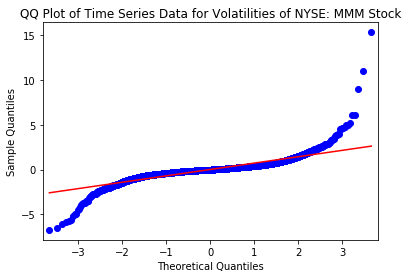

In [59]:
##QQ Plot
time_series = Data_ex_splits['MMM'].squeeze()
sm.qqplot(time_series, line='s')  #
plt.title('QQ Plot of Time Series Data for Volatilities of NYSE: MMM Stock')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

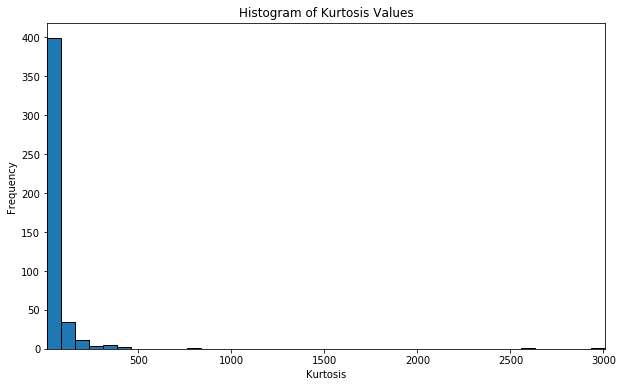

Number of stocks that have volatilities with kurtosis above 3: 457

Number of stocks that have volatilities with kurtosis at 3: 0

Number of stocks that have volatilities with kurtosis below 3: 0


In [93]:
##Calculation of Kurtosis
from scipy.stats import kurtosis

#Calculate kurtosis for each column in the DataFrame
kurtosis_values = Data_ex_splits.apply(kurtosis)
plt.figure(figsize=(10, 6))
plt.hist(kurtosis_values, bins= 40, edgecolor='black')
plt.title('Histogram of Kurtosis Values')
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.xlim(min(kurtosis_values), max(kurtosis_values))
plt.show()

print("Number of stocks that have volatilities with kurtosis above 3: {}".format((kurtosis_values > 3).sum()))
print("\nNumber of stocks that have volatilities with kurtosis at 3: {}".format((kurtosis_values == 3).sum()))
print("\nNumber of stocks that have volatilities with kurtosis below 3: {}".format((kurtosis_values < 3).sum()))

#Kurtosis function calculates Fisher's kurtosis, where calculated kurtosis is subtracted by 3
#so that positive kurtosis represents leptokurtosis while negative kurtosis represents Platykurtic

In [90]:

(kurtosis_values < 3).sum()

457

In [336]:
splits_over_last_five_years.columns

Index(['GOOGL', 'GOOG', 'AMZN', 'APH', 'AAPL', 'ANET', 'T', 'BDX', 'TECH',
       'BWA', 'COO', 'CPRT', 'CSGP', 'CSX', 'DXCM', 'DTE', 'EW', 'EXC', 'FAST',
       'FTNT', 'FTV', 'GE', 'IBM', 'IP', 'ISRG', 'K', 'LH', 'MKC', 'MRK',
       'MCHP', 'MNST', 'NDAQ', 'NEE', 'NVDA', 'ODFL', 'PCAR', 'PANW', 'PFE',
       'RJF', 'RTX', 'O', 'ROL', 'SRE', 'SHW', 'TSLA', 'WRB', 'WMT', 'ZBH'],
      dtype='object')